## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [353]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, pairwise
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

Get the Cycle Power Plant Data Set

In [355]:
data = pd.read_excel('../data/Folds5x2_pp.xlsx',sheet_name = "Sheet1")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [358]:
print("Rows x columns: ",data.shape)

Rows x columns:  (9568, 5)


#### ii. pairwise scatterplots of all the varianbles

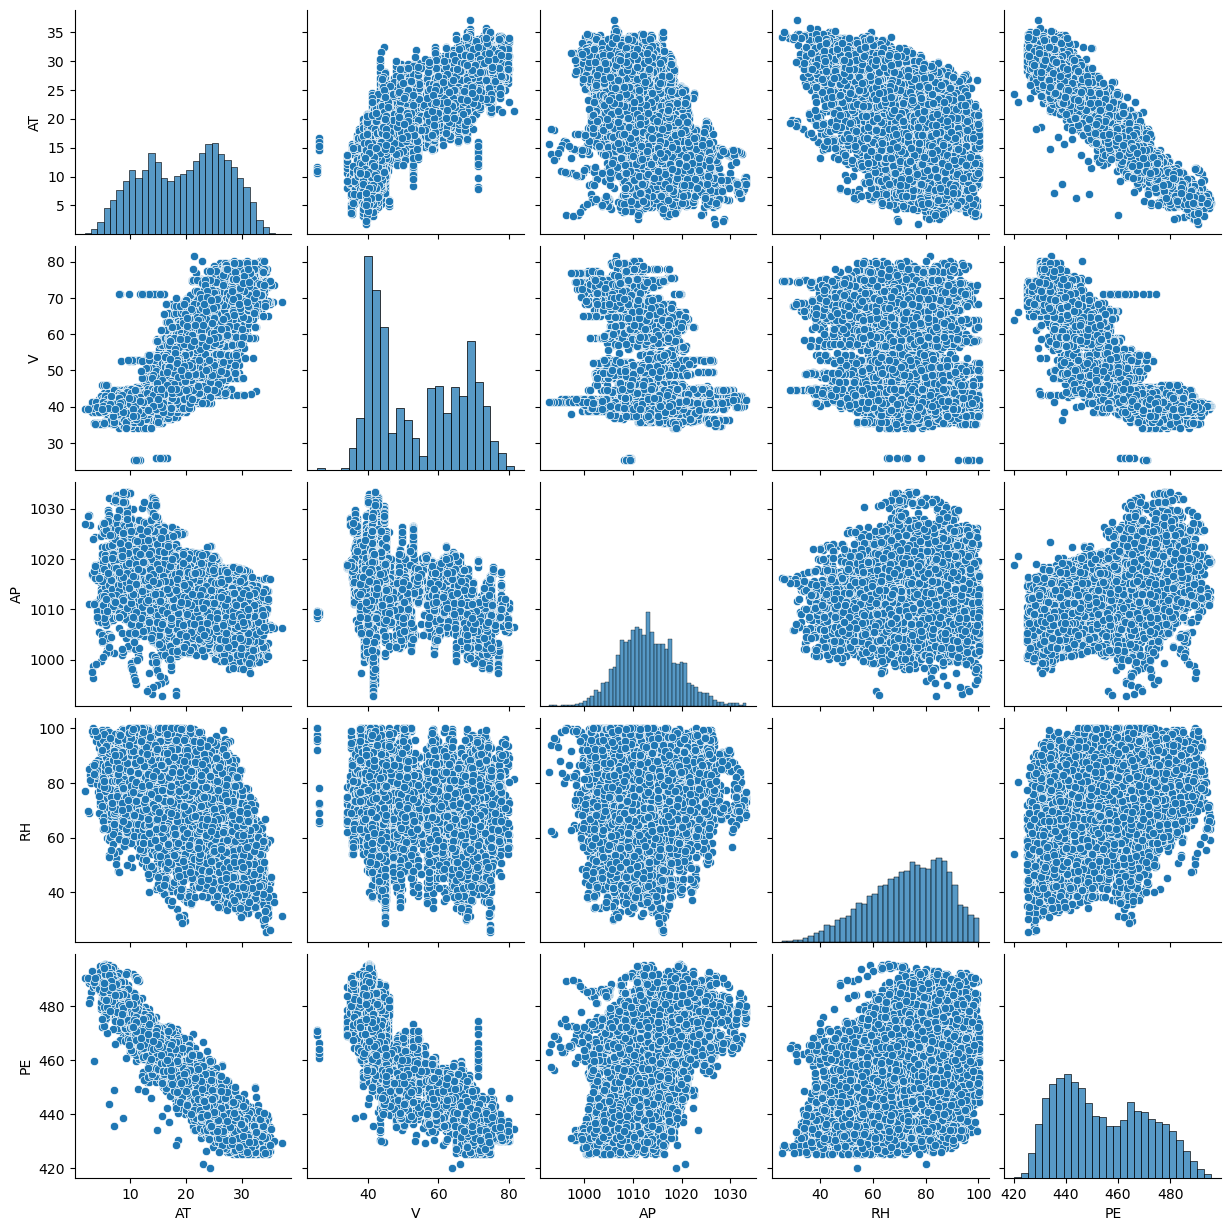

In [360]:
sns.pairplot(data)
plt.show()

Observations:
1. AT vs PE has negative linear relationship which suggests that higher temperature may reduce Power efficiency
2. V vs PE also has negative linear relationship which suggests higher Exhaust Vaccum reduces Power efficiency
3. AP vs PE and RH vs PE have broader scatter plots hence relation is less clear.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [363]:
summary = data.describe()
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
summary.loc['IQR'] = summary.loc['75%'] - summary.loc['25%']
summary

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

Results for  AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:57:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3

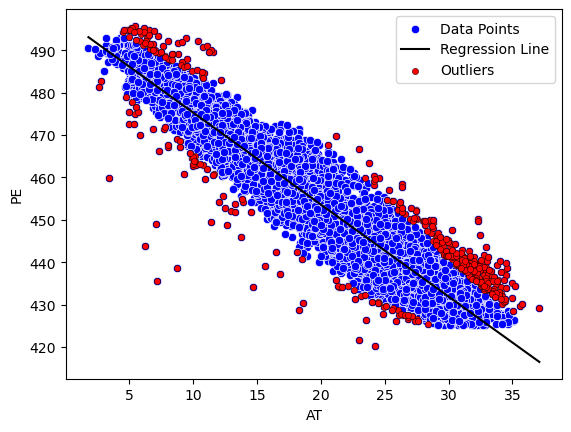

Results for  AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    

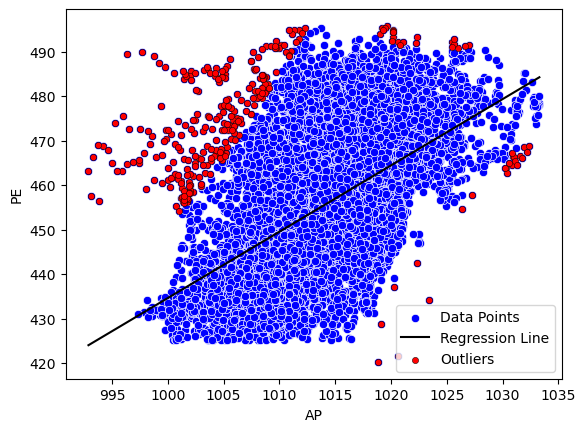

Results for  RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:57:51   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    

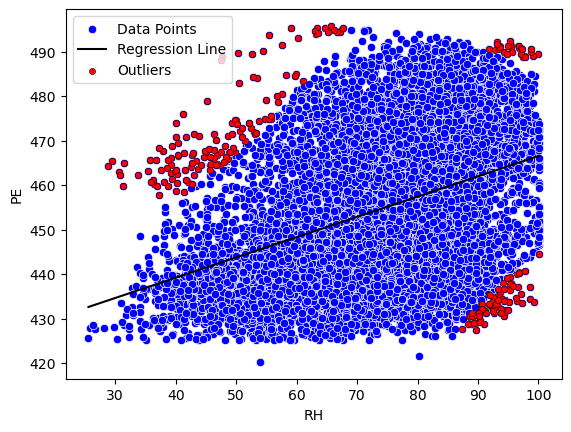

Results for  V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:04   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   13

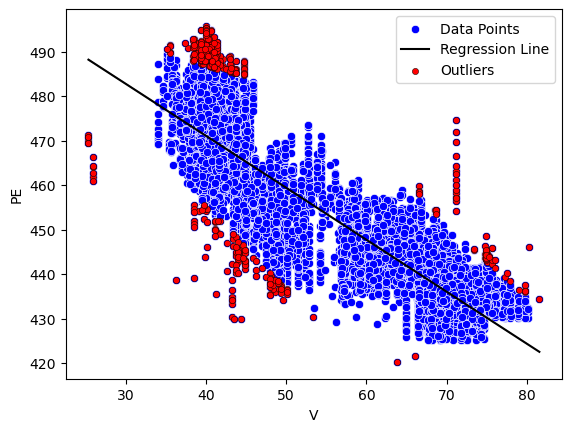

In [365]:
predictors = ['AT', 'AP', 'RH', 'V']


for predictor in predictors:
    X = data[[predictor]] 
    y = data['PE'] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    results.append((predictor, model))

    # Print summary
    print("Results for ",predictor)
    print(model.summary())

    influence = OLSInfluence(model)
    cooks_distance = influence.cooks_distance[0]
    n = len(data)
    threshold = 4 / n
    outliers = cooks_distance > threshold

    sns.scatterplot(x=data[predictor], y=data['PE'], color='blue', label='Data Points')
    sns.lineplot(x=data[predictor], y=model.predict(X), color='black', label='Regression Line')
    outlier_data = data[outliers]
    sns.scatterplot(x=outlier_data[predictor], y=outlier_data['PE'], color='red', label='Outliers', s= 20, edgecolor='black')

    
    plt.show()

### (d) Multiple Regression

In [367]:
X = data[['AT', 'AP', 'RH', 'V']] 
y = data['PE'] 
X = sm.add_constant(X)  
model_multiple = sm.OLS(y, X).fit()  

print("Multiple Regression Results:")
print(model_multiple.summary())

Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093  

<h4>Observation:<br>
Since p-value for all predictors is 0.00, value < 0.05, we can reject the Null Hypothesis.</h4>

### (e) 1c Compare to 1d

/var/folders/2c/s925fl3x5xq1m_h01qbrfjw80000gn/T/ipykernel_30752/2480937718.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simple_coeffs.append(model.params[1])
/var/folders/2c/s925fl3x5xq1m_h01qbrfjw80000gn/T/ipykernel_30752/2480937718.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simple_coeffs.append(model.params[1])
/var/folders/2c/s925fl3x5xq1m_h01qbrfjw80000gn/T/ipykernel_30752/2480937718.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

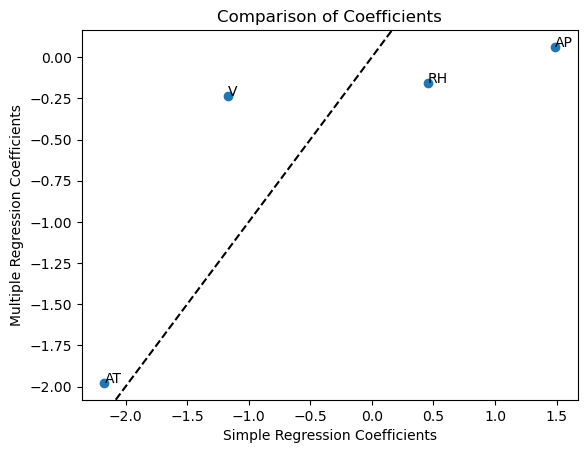

In [370]:
simple_coeffs = []
for predictor in predictors:
    X = data[[predictor]] 
    y = data['PE']  
    X = sm.add_constant(X)  
    model = sm.OLS(y, X).fit()
    simple_coeffs.append(model.params[1])  

multiple_coeffs = model_multiple.params[1:5]  

# Plot comparison
plt.scatter(simple_coeffs, multiple_coeffs)
for i, predictor in enumerate(predictors):
    plt.text(simple_coeffs[i], multiple_coeffs[i], predictor)
plt.axline( (0,0),slope=1,linestyle='--',color='black')
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Coefficients")
plt.show()


<h4>Observations:<br>
For AT, the univariate regression coefficients is similar to the multiple regression coefficients. </h4>

### (f) Nonlinear Association

In [373]:
for predictor in predictors:
    X = data[[predictor]] 
    y = data['PE'] 

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)

    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    
    print("Nonlinear Regression Results for ",predictor)
    print(model.summary())
    print("\n\n")

Nonlinear Regression Results for  AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

### (g) Interactions of Predictors

In [375]:
df2 = data.copy()
df2['AT_AP'] = data['AT'] * data['AP']
df2['AT_RH'] = data['AT'] * data['RH']
df2['AT_V'] = data['AT'] * data['V']
df2['AP_RH'] = data['AP'] * data['RH']
df2['AP_V'] = data['AP'] * data['V']
df2['RH_V'] = data['RH'] * data['V']

X = df2.drop('PE', axis=1)
y = df2['PE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("Interaction Terms Regression Results:")
print(model.summary())


Interaction Terms Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6

<h4>Observations:<br>
1. V, AP, RH are statistically significant as p-value < 0.05 <br>
2. The interactions between AT-RH, AT-V, AP-RH and AP-V are statistically significant as p-value < 0.05 </h4>

### (h) Improvement

In [378]:
result = []

train_set, test_set = train_test_split(data, train_size=0.7)
X_train = train_set[["AT", "V", "AP", "RH"]]
Y_train = train_set[["PE"]]
X_test = test_set[["AT", "V", "AP", "RH"]]
Y_test = test_set[["PE"]]

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)




In [379]:

# regression 
regr_model1 = sm.OLS(Y_train, X_train_sm)
regr_res = regr_model1.fit()

regr_train_pred = regr_res.predict(X_train_sm)
regr_test_pred = regr_res.predict(X_test_sm)


regr_train_mse = mean_squared_error(Y_train, regr_train_pred)
regr_test_mse = mean_squared_error(Y_test, regr_test_pred)
result.append(["Linear Regression",regr_test_mse])

In [380]:
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(X_train)

full_mod = sm.OLS(Y_train, X_train_transform)
full_res = full_mod.fit()

# Display model summary
print(full_res.summary())

# Check how features are combined
display(poly.get_feature_names_out())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     7481.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -19074.
No. Observations:                6697   AIC:                         3.818e+04
Df Residuals:                    6682   BIC:                         3.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8339.0673   1419.183     -5.876      0.0

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

In [381]:
# Remove x7,x9,x10,x11
X_train_transform_reduce = X_train_transform[:, [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 14]]
X_test_transform_reduce = poly.fit_transform(X_test)[:, [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 14]]


reduce_model3 = sm.OLS(Y_train, X_train_transform_reduce)
reduce_res = reduce_model3.fit()

reduce_train_pred = reduce_res.predict(X_train_transform_reduce)
reduce_test_pred = reduce_res.predict(X_test_transform_reduce)


reduce_train_mse = mean_squared_error(Y_train, reduce_train_pred)
reduce_test_mse = mean_squared_error(Y_test, reduce_test_pred)
result.append(["Regression with reduced Interactions and Quadratic",reduce_test_mse])
print(reduce_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -19080.
No. Observations:                6697   AIC:                         3.818e+04
Df Residuals:                    6686   BIC:                         3.826e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.029e+04   1077.527     -9.553      0.0

In [431]:
print("Results:")
print("Linear Regression MSE - Train: "+str(regr_train_mse)+" Test: "+str(regr_test_mse))
print("Linear Regression with reduced Interactions and Quadratic MSE - Train: "+str(reduce_train_mse)+" Test: "+str(reduce_test_mse))

Results:
Linear Regression MSE - Train: 20.049369768337737 Test: 22.469123887529786
Linear Regression with reduced Interactions and Quadratic MSE - Train: 17.46269401609759 Test: 19.768282729819266


### (i) KNN

In [384]:
#raw features
k_values = [i for i in range(1, 101)]
k_inverse = [1/k for k in k_values]

train_mse_raw = list()
test_mse_raw = list()

for k in k_values:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    train_raw_pred = neigh.predict(X_train)
    test_raw_pred = neigh.predict(X_test)
    train_mse_raw.append(mean_squared_error(Y_train, train_raw_pred))
    test_mse_raw.append(mean_squared_error(Y_test, test_raw_pred))

print('Minimum train MSE with raw features:', min(train_mse_raw))
print('Optimal k for training =', k_values[np.argmin(train_mse_raw)])
print('Minimum test MSE with raw features:', min(test_mse_raw))
print('Optimal k for testing=', k_values[np.argmin(test_mse_raw)])

result.append(["KNN with raw feature",min(test_mse_raw)])

Minimum train MSE with raw features: 0.0
Optimal k for training = 1
Minimum test MSE with raw features: 17.141867645806737
Optimal k for testing= 6


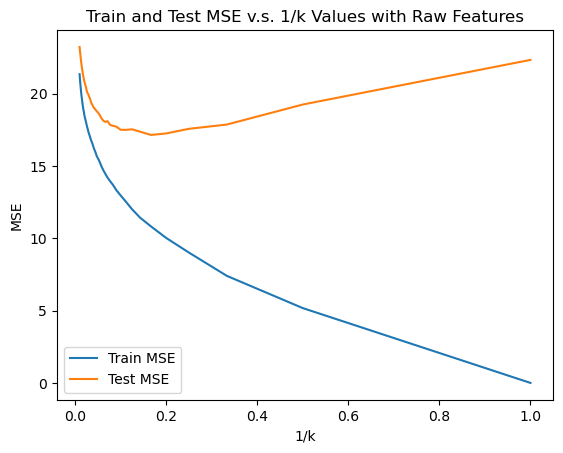

In [385]:
plt.plot(k_inverse, train_mse_raw, label='Train MSE')
plt.plot(k_inverse, test_mse_raw, label='Test MSE')
plt.title('Train and Test MSE v.s. 1/k Values with Raw Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

plt.show()

In [386]:
#normalization
scaler = MinMaxScaler()
scaling_model = scaler.fit(X_train)

X_train_norm = scaling_model.transform(X_train)
X_test_norm = scaling_model.transform(X_test)

train_mse_norm = list()
test_mse_norm = list()

for k in k_values:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_norm, Y_train)
    train_norm_pred = neigh.predict(X_train_norm)
    test_norm_pred = neigh.predict(X_test_norm)
    train_mse_norm.append(mean_squared_error(Y_train, train_norm_pred))
    test_mse_norm.append(mean_squared_error(Y_test, test_norm_pred))

print('Minimum train MSE with Normalization:', min(train_mse_norm))
print('Optimal k for training =', k_values[np.argmin(train_mse_norm)])
print('Minimum test MSE with Normalization:', min(test_mse_norm))
print('Optimal k for testing =', k_values[np.argmin(test_mse_norm)])

result.append(["KNN with Normalization",min(test_mse_norm)])

Minimum train MSE with Normalization: 0.0
Optimal k for training = 1
Minimum test MSE with Normalization: 16.096908096046675
Optimal k for testing = 4


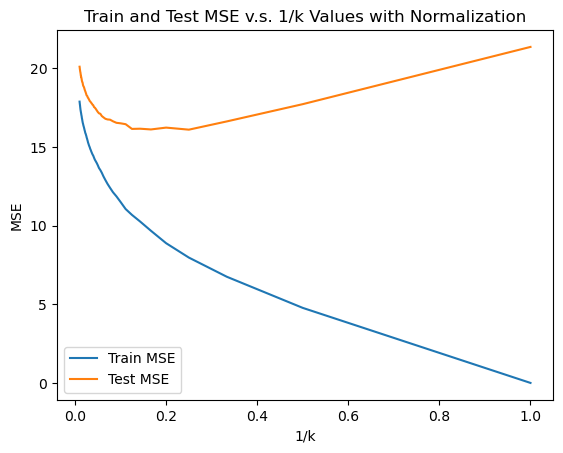

In [387]:
plt.plot(k_inverse, train_mse_norm, label='Train MSE')
plt.plot(k_inverse, test_mse_norm, label='Test MSE')
plt.title('Train and Test MSE v.s. 1/k Values with Normalization')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

plt.show()

### (j ) Compare KNN and Linear

In [429]:
print(tabulate(result, headers=['Algorithm', 'MSE Test Error']))

Algorithm                                             MSE Test Error
--------------------------------------------------  ----------------
Linear Regression                                            22.4691
Regression with reduced Interactions and Quadratic           19.7683
KNN with raw feature                                         17.1419
KNN with Normalization                                       16.0969
